# Analysis of Twitter Chatbot_Dataset

## Headers_Clarification

The header for column A, this header is blank. However, I assume it is the total of tweets in ascending order.   
The header for column B, author_id, includes the identity of the person inializing the tweet.  
The header for column C, inbound, notifies whether the tweet was inbound or outbound. If Inbound, a boolean variable of true is displayed. If Outbound, a boolean variable of false is displayed.  
The header for column D, created_at, includes the date and time the tweet was created.  
The header for column E, text, includes the actual tweet message.  
The header for column F, response_tweet_id, includes the conversation_id of the original tweet.  
The header for column G, the in_response_to_tweet_id, includes a defined conversation_id on each reply, which matches the Tweet ID of the original Tweet that started the conversation.  

## Data_Clarification

Chatbots are AI-based virtual assistant applications developed to answer the questions of the customers on a specific topics or field. These applications are used by the companies to assist their large group of customers without any human. And to train such chatbots, huge quantity of training datasets is required for the machine learning chatbot algorithms, so that model can learn from the datasets and answer the questions when used in real-life.  

The Twitter Chatbot is used to communicate with humans in texts. This AI-based application can assist a large number of people with answering their queries from relevant topics.  

The Twitter Chatbot Data is used with natural language processing (NLP) to make it understandable to machine through certain algorithms.  

Each tweet is annotated with added metadata to make the sentence or language understandable to machine. And when different types of communication data sets are annotated or labeled it becomes training data sets.  

Brown, R. (2020, May 7). What is Chatbot Training Data & Why You Need High-quality Datasets? https://chatbotslife.com/what-is-chatbot-training-data-why-you-need-high-quality-datasets-b0636ef9b1b1  

There are several steps involved in data analysis. The first step is to explore and visualize the data to identify areas that need further evaluation. This process is called Data Exploration. During this process, the user can get a better understanding of the data so they are able to build efficient and predictive models.  

# Python Interactive Dashboard

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re, nltk
import string
from pandas import DataFrame
from pandas import Series
sns.set(color_codes=True)


Capston uploaded on GitHub:https://github.com/Machine34/Analysis-of-Twitter-Chatbot_Dataset-.git
        

In [2]:
# import .csv file 
df = pd.read_csv('twcs.csv')

In [3]:
# Observe the dataset by checking the rows using the head() method. Put number of rows in parenthesis to observe all
df.head(1048576)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
...,...,...,...,...,...,...,...
1048570,1160526,122264,True,Tue Oct 24 16:30:49 +0000 2017,When @Morrisons does you good 🙌 https://t.co/6...,"116,052,511,605,271,000,000",NaN
1048571,1160529,Morrisons,False,Tue Oct 24 16:40:49 +0000 2017,@393038 ... Along with your More card and addr...,NaN,1160530.0
1048572,1160530,393038,True,Tue Oct 24 16:04:48 +0000 2017,@Morrisons https://t.co/mnGeW3E7N8,1160529,1160531.0
1048573,1160531,393038,True,Tue Oct 24 16:04:13 +0000 2017,"@Morrisons watford, bought crayfish tails the ...","11,605,301,160,532",NaN


## Now it is time to check out the details of the dataset

### Dataframe Information

In [4]:
# print information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   tweet_id                 1048575 non-null  int64  
 1   author_id                1048575 non-null  object 
 2   inbound                  1048575 non-null  bool   
 3   created_at               1048575 non-null  object 
 4   text                     1048575 non-null  object 
 5   response_tweet_id        683860 non-null   object 
 6   in_response_to_tweet_id  767999 non-null   float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 49.0+ MB


### Dataframe Statistics

In [5]:
# use describe() method to show basic statistical characteristics of each numerical feature
df.describe()

,tweet_id,in_response_to_tweet_id
count,1.048575e+06,7.679990e+05
mean,5.851802e+05,5.781865e+05
std,3.325607e+05,3.344554e+05
min,1.000000e+00,1.000000e+00
25%,2.959935e+05,2.853185e+05
50%,5.840990e+05,5.739510e+05
75%,8.736605e+05,8.688855e+05
max,1.160532e+06,1.160531e+06


## Next Step Data Cleansing 

### Missing Values - with this step I found two columns with missing data

In [6]:
print('Number of missing values in each column')
print(df.isnull().sum()) 

Number of missing values in each column
tweet_id                        0
author_id                       0
inbound                         0
created_at                      0
text                            0
response_tweet_id          364715
in_response_to_tweet_id    280576
dtype: int64


### Now I will fill the missing Data

In [7]:
# filling the missing values.
df.fillna(df.median(),inplace=True)

C:\Users\bjsav\AppData\Local\Temp\ipykernel_12628\2406157058.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(),inplace=True)


### After checking again for missing values, I found one column still has missing values. I will take care of with Outliers

In [8]:
print('Number of missing values in each column')
print(df.isnull().sum()) 

Number of missing values in each column
tweet_id                        0
author_id                       0
inbound                         0
created_at                      0
text                            0
response_tweet_id          364715
in_response_to_tweet_id         0
dtype: int64


### Deleting null data - Getting rid of all blanks and zeros

In [9]:
# Dropping off the null data
df.dropna().head(1048576)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
...,...,...,...,...,...,...,...
1048566,1160522,393037,True,Sun Oct 15 20:30:56 +0000 2017,@AppleSupport Why do photos take up so much sp...,1160524,1160521.0
1048568,1160523,393037,True,Sun Oct 15 18:49:27 +0000 2017,@AppleSupport I need help with my iCloud Photo...,1160521,573951.0
1048570,1160526,122264,True,Tue Oct 24 16:30:49 +0000 2017,When @Morrisons does you good 🙌 https://t.co/6...,"116,052,511,605,271,000,000",573951.0
1048572,1160530,393038,True,Tue Oct 24 16:04:48 +0000 2017,@Morrisons https://t.co/mnGeW3E7N8,1160529,1160531.0


### Checking duplicated values - No duplicate values were found

In [10]:
# checking for duplicate values
duplicatedValues = df.duplicated()
print(duplicatedValues.sum())
df[duplicatedValues]

0


,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id


### Remove irrelevant data with Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

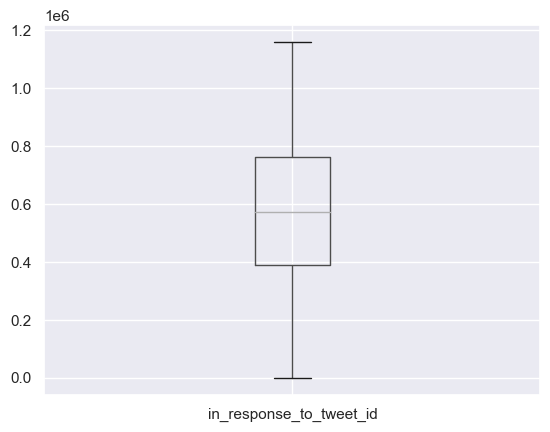

In [11]:
# Handling Outliers in the data. Finding Outliers in the data using boxplot
df.boxplot(column=['in_response_to_tweet_id'])
plt.show

### Join Columns

In [12]:
#Join columns: select columns called 'text' and 'response_tweet_id'
df_new = df[['text', 'author_id']]

#view new DataFrame
df_new

,text,author_id
0,@115712 I understand. I would like to assist y...,sprintcare
1,@sprintcare and how do you propose we do that,115712
2,@sprintcare I have sent several private messag...,115712
3,@115712 Please send us a Private Message so th...,sprintcare
4,@sprintcare I did.,115712
...,...,...
1048570,When @Morrisons does you good 🙌 https://t.co/6...,122264
1048571,@393038 ... Along with your More card and addr...,Morrisons
1048572,@Morrisons https://t.co/mnGeW3E7N8,393038
1048573,"@Morrisons watford, bought crayfish tails the ...",393038


### Lower Casing - change all letters to lower case to assist with data cleansing

In [13]:
# Lower casing used for string handling
df['text']=df['text'].str.lower()

### Verify lower casing

In [14]:
df.head(1048576)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 i understand. i would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare i have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 please send us a private message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare i did.,4,6.0
...,...,...,...,...,...,...,...
1048570,1160526,122264,True,Tue Oct 24 16:30:49 +0000 2017,when @morrisons does you good 🙌 https://t.co/6...,"116,052,511,605,271,000,000",573951.0
1048571,1160529,Morrisons,False,Tue Oct 24 16:40:49 +0000 2017,@393038 ... along with your more card and addr...,NaN,1160530.0
1048572,1160530,393038,True,Tue Oct 24 16:04:48 +0000 2017,@morrisons https://t.co/mngew3e7n8,1160529,1160531.0
1048573,1160531,393038,True,Tue Oct 24 16:04:13 +0000 2017,"@morrisons watford, bought crayfish tails the ...","11,605,301,160,532",573951.0


### Remove stop words NLTK Natural Language Toolkit

In [15]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [16]:
#Remove Stop Words from Text in DataFrame Column using NLTK (Natural Language Toolkit) 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
stop_words=set(stopwords.words('english'))  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bjsav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
def remove_stop(x):
    return ",".join([word for word in str(x).split() if word not in stop_words])
df['text'] = df['text'].apply(lambda x: remove_stop(x))    

### Verify removal of stopwords

In [18]:
df.head(1048576)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,"@115712,understand.,would,like,assist,you.,wou...",2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,"@sprintcare,propose",NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,"@sprintcare,sent,several,private,messages,one,...",1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,"@115712,please,send,us,private,message,assist,...",3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,"@sprintcare,did.",4,6.0
...,...,...,...,...,...,...,...
1048570,1160526,122264,True,Tue Oct 24 16:30:49 +0000 2017,"@morrisons,good,🙌,https://t.co/6iezzbmhmn","116,052,511,605,271,000,000",573951.0
1048571,1160529,Morrisons,False,Tue Oct 24 16:40:49 +0000 2017,"@393038,...,along,card,address,details,get,sor...",NaN,1160530.0
1048572,1160530,393038,True,Tue Oct 24 16:04:48 +0000 2017,"@morrisons,https://t.co/mngew3e7n8",1160529,1160531.0
1048573,1160531,393038,True,Tue Oct 24 16:04:13 +0000 2017,"@morrisons,watford,,bought,crayfish,tails,day....","11,605,301,160,532",573951.0


### Removal of frequent words

In [19]:
from collections import Counter
cnt = Counter()

for text in df['text'].values:
    for word in text.split():
        cnt[word]+=1
cnt.most_common(10)

[('@uber_support,__email__', 136),
 ('@amazonhelp', 125),
 ('@amazonhelp,yes', 108),
 ('@verizonsupport,yes', 103),
 ('@applesupport,yes', 96),
 ('@amazonhelp,done', 91),
 ('@applesupport', 89),
 ('@safaricom_care,thanks', 78),
 ('@amazonhelp,thank', 75),
 ('@amazonhelp,thanks', 75)]

In [20]:
# Remove nurerical data from frequent words
freq_words=set([w for (w, wc) in cnt.most_common(10)])

In [21]:
# Verify numerical data has been removed
freq_words

{'@amazonhelp',
 '@amazonhelp,done',
 '@amazonhelp,thank',
 '@amazonhelp,thanks',
 '@amazonhelp,yes',
 '@applesupport',
 '@applesupport,yes',
 '@safaricom_care,thanks',
 '@uber_support,__email__',
 '@verizonsupport,yes'}

In [22]:
# Removal of frequent words
def remove_freq(x):
    return " ".join([word for word in str(x).split() if word not in freq_words])

df['text'] = df['text'].apply(lambda x: remove_freq(x))

In [23]:
df.head(1048576)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,"@115712,understand.,would,like,assist,you.,wou...",2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,"@sprintcare,propose",NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,"@sprintcare,sent,several,private,messages,one,...",1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,"@115712,please,send,us,private,message,assist,...",3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,"@sprintcare,did.",4,6.0
...,...,...,...,...,...,...,...
1048570,1160526,122264,True,Tue Oct 24 16:30:49 +0000 2017,"@morrisons,good,🙌,https://t.co/6iezzbmhmn","116,052,511,605,271,000,000",573951.0
1048571,1160529,Morrisons,False,Tue Oct 24 16:40:49 +0000 2017,"@393038,...,along,card,address,details,get,sor...",NaN,1160530.0
1048572,1160530,393038,True,Tue Oct 24 16:04:48 +0000 2017,"@morrisons,https://t.co/mngew3e7n8",1160529,1160531.0
1048573,1160531,393038,True,Tue Oct 24 16:04:13 +0000 2017,"@morrisons,watford,,bought,crayfish,tails,day....","11,605,301,160,532",573951.0


### Remove Punctuation

In [24]:
#Remove punctuation from multiple columns in Pandas Dataframe

def remove_punctuation(x):
    try:
        x = x.str.replace('[^\w\s]','')
    except:
        pass
    return x

df.apply(remove_punctuation)

C:\Users\bjsav\AppData\Local\Temp\ipykernel_12628\59279555.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  x = x.str.replace('[^\w\s]','')


,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 221047 0000 2017,115712understandwouldlikeassistyouwouldneedget...,2,3.0
1,2,115712,True,Tue Oct 31 221145 0000 2017,sprintcarepropose,NaN,1.0
2,3,115712,True,Tue Oct 31 220827 0000 2017,sprintcaresentseveralprivatemessagesonerespond...,1,4.0
3,4,sprintcare,False,Tue Oct 31 215449 0000 2017,115712pleasesendusprivatemessageassistyouclick...,3,5.0
4,5,115712,True,Tue Oct 31 214935 0000 2017,sprintcaredid,4,6.0
...,...,...,...,...,...,...,...
1048570,1160526,122264,True,Tue Oct 24 163049 0000 2017,morrisonsgoodhttpstco6iezzbmhmn,116052511605271000000,573951.0
1048571,1160529,Morrisons,False,Tue Oct 24 164049 0000 2017,393038alongcardaddressdetailsgetsortedyouthank...,NaN,1160530.0
1048572,1160530,393038,True,Tue Oct 24 160448 0000 2017,morrisonshttpstcomngew3e7n8,1160529,1160531.0
1048573,1160531,393038,True,Tue Oct 24 160413 0000 2017,morrisonswatfordboughtcrayfishtailsdayeatbyhtt...,11605301160532,573951.0


## Now that the cleansing process has been taken care of, it is time for visualizing the data

### Viewing top 10 companys with the most tweets

In [25]:
top_users=df['author_id'].value_counts()[:10]
top_users

AmazonHelp         79139
AppleSupport       32945
Uber_Support       21411
Delta              16372
SpotifyCares       14328
AmericanAir        14324
Tesco              11430
British_Airways    11261
comcastcares       10860
TMobileHelp        10823
Name: author_id, dtype: int64

### Out of top ten companys, the top three are : 
AmazonHelp         
AppleSupport       
Uber_Support

### Top 10 authors with the most tweets

In [26]:
tu = top_users.reset_index(level=0)
tu

,index,author_id
0,AmazonHelp,79139
1,AppleSupport,32945
2,Uber_Support,21411
3,Delta,16372
4,SpotifyCares,14328
5,AmericanAir,14324
6,Tesco,11430
7,British_Airways,11261
8,comcastcares,10860
9,TMobileHelp,10823


## Used a Bar Chart to display Top 10 authors with the most tweets

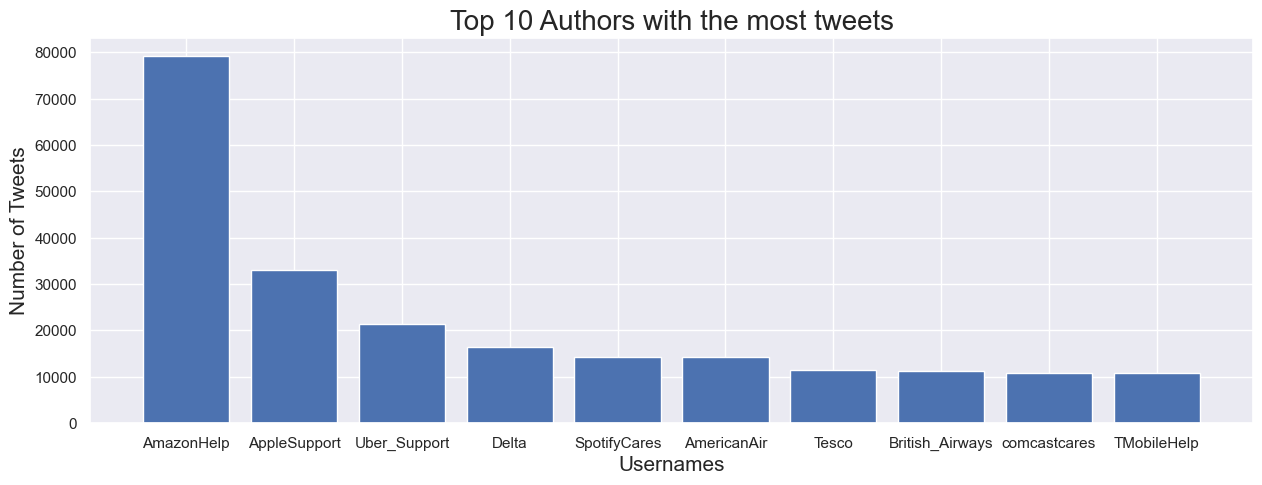

In [27]:
fig = plt.figure(figsize = (15, 5))
plt.bar(tu['index'],tu['author_id'])
plt.title("Top 10 Authors with the most tweets", fontsize = 20)
plt.xlabel("Usernames", fontsize = 15)
plt.ylabel("Number of Tweets", fontsize = 15)
plt.show()

## Used a Pie Chart for a better visual of the data (Top 10 authors with the most tweets)

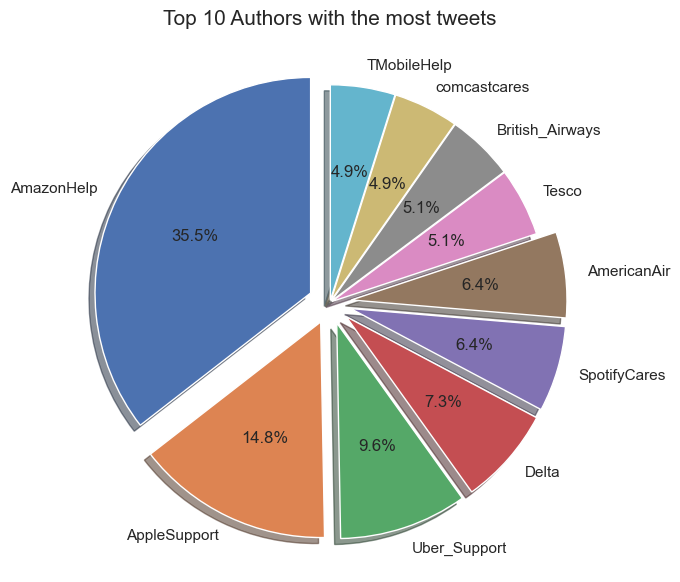

In [28]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.pie(tu['author_id'], labels = tu['index'],startangle=90, autopct='%1.1f%%',shadow=True,explode=(0.1, 0.1, 0.1, 0.1,0.1,0.1,0.01,0.01,0.01,0.01,))
ax.set_title("Top 10 Authors with the most tweets", fontsize = 15)

plt.show()

### Check Inbound column for number of accurate inbound tweets
#### Now that I know who the top authors are, I want to know how many tweets are accurate

In [29]:
# checking for number of Inbound rows = true
df.inbound[df.inbound == True].count()

574752

In [30]:
# checking for number of Inbound rows = false
df.inbound[df.inbound == False].count()

473823

#### Separate Inbound column with true inbound tweets

In [31]:
tdf = df[df.inbound != 0]
tdf

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,"@sprintcare,propose",NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,"@sprintcare,sent,several,private,messages,one,...",1,4.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,"@sprintcare,did.",4,6.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,"@sprintcare,worst,customer,service","9,6,10",573951.0
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,"@sprintcare,gonna,magically,change,connectivit...","11,13,14",15.0
...,...,...,...,...,...,...,...
1048566,1160522,393037,True,Sun Oct 15 20:30:56 +0000 2017,"@applesupport,photos,take,much,space,phone,the...",1160524,1160521.0
1048568,1160523,393037,True,Sun Oct 15 18:49:27 +0000 2017,"@applesupport,need,help,icloud,photo,library",1160521,573951.0
1048570,1160526,122264,True,Tue Oct 24 16:30:49 +0000 2017,"@morrisons,good,🙌,https://t.co/6iezzbmhmn","116,052,511,605,271,000,000",573951.0
1048572,1160530,393038,True,Tue Oct 24 16:04:48 +0000 2017,"@morrisons,https://t.co/mngew3e7n8",1160529,1160531.0


### Separate Inbound column with false inbound tweets

In [32]:
fdf = df[df.inbound == 0]
fdf

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,"@115712,understand.,would,like,assist,you.,wou...",2,3.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,"@115712,please,send,us,private,message,assist,...",3,5.0
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,"@115712,please,send,us,private,message,,gain,d...","5,7",8.0
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,"@115713,saddening,hear.,please,shoot,us,dm,,lo...",NaN,12.0
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,"@115713,understand,concerns,we'd,like,please,s...",12,16.0
...,...,...,...,...,...,...,...
1048565,1160521,AppleSupport,False,Sun Oct 15 18:56:00 +0000 2017,"@393037,would,like,help,this.,going,icloud,pho...",1160522,1160523.0
1048567,1160524,AppleSupport,False,Sun Oct 15 20:36:00 +0000 2017,"@393037,choosing,option,""optimize,iphone,stora...",NaN,1160522.0
1048569,1160525,Morrisons,False,Tue Oct 24 16:41:19 +0000 2017,"@122264,hey,kay-you,got,really,good,bargain,th...",NaN,1160526.0
1048571,1160529,Morrisons,False,Tue Oct 24 16:40:49 +0000 2017,"@393038,...,along,card,address,details,get,sor...",NaN,1160530.0


### Find top 10 inbound accurate tweets

In [33]:
top_inbound=tdf['author_id'].value_counts()[:10]
top_inbound

115911    454
169172    448
120576    241
115913    226
116230    182
169916    172
115850    168
326613    163
117627    161
170351    157
Name: author_id, dtype: int64

### Index top 10 inbound accurate tweets by authors

In [34]:
intu = top_inbound.reset_index(level=0)
intu

,index,author_id
0,115911,454
1,169172,448
2,120576,241
3,115913,226
4,116230,182
5,169916,172
6,115850,168
7,326613,163
8,117627,161
9,170351,157


### Bar Plot Index top 10 inbound accurate tweets by authors

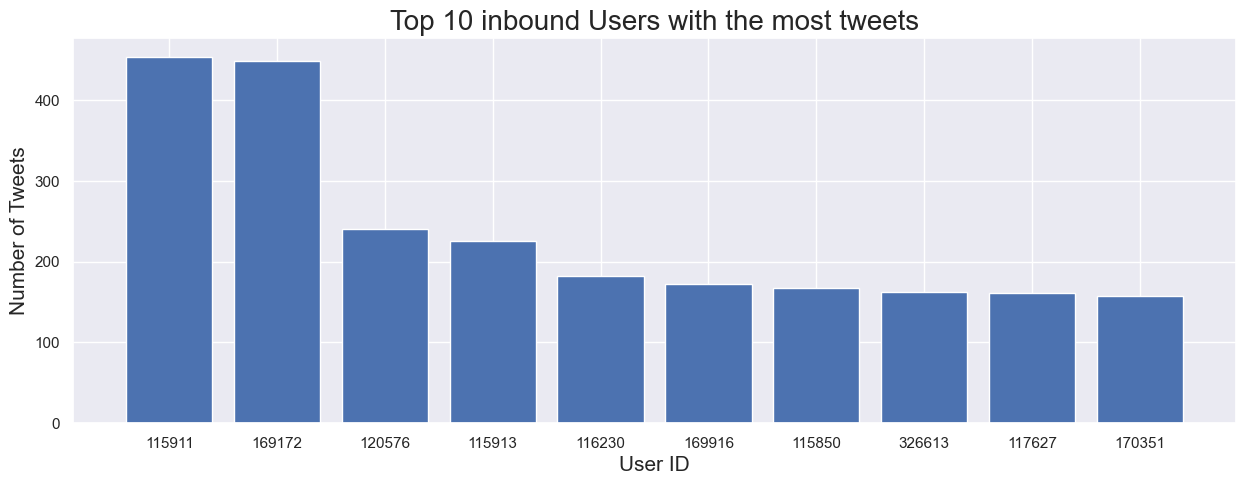

In [35]:
fig = plt.figure(figsize = (15, 5))
plt.bar(intu['index'],intu['author_id'])
plt.title("Top 10 inbound Users with the most tweets", fontsize = 20)
plt.xlabel("User ID", fontsize = 15)
plt.ylabel("Number of Tweets", fontsize = 15)
plt.show()

### Pie Chart for percentages of Index top 10 inbound "accurate tweets" by authors

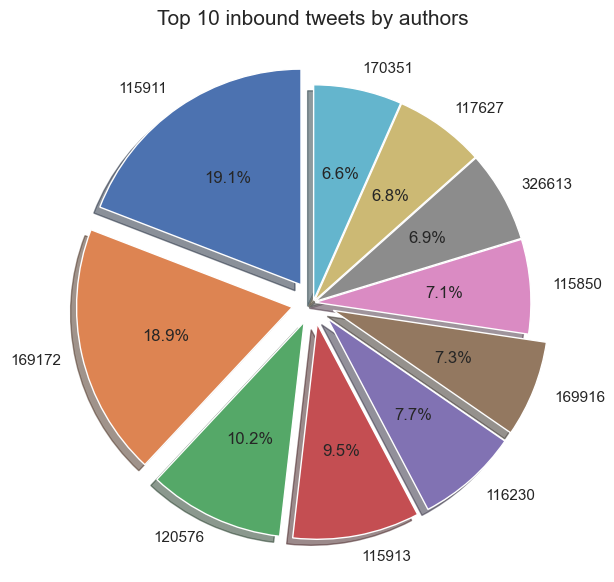

In [36]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.pie(intu['author_id'], labels = intu['index'],startangle=90, autopct='%1.1f%%',shadow=True,explode=(0.1, 0.1, 0.1, 0.1,0.1,0.1,0.01,0.01,0.01,0.01,))
ax.set_title("Top 10 inbound tweets by authors", fontsize = 15)

plt.show()

### View top authors by response

In [37]:
rsdf = df[df['response_tweet_id'].notnull()]

rscount = rsdf['response_tweet_id'].apply(lambda x: len(x.split(',')))
rscount

0          1
2          1
3          1
4          1
5          2
          ..
1048566    1
1048568    1
1048570    7
1048572    1
1048573    5
Name: response_tweet_id, Length: 683860, dtype: int64

### Just looking at the response_id is no good, will compare response_id with author_id

In [38]:
rcdf = pd.DataFrame({'author_id': df['author_id'],
     'response_tweet_id': df['response_tweet_id'],
     'response_count': rscount
    })
rcdf[:20]

,author_id,response_tweet_id,response_count
0,sprintcare,2,1.0
1,115712,NaN,NaN
2,115712,1,1.0
3,sprintcare,3,1.0
4,115712,4,1.0
5,sprintcare,"5,7",2.0
6,115712,"9,6,10",3.0
7,sprintcare,NaN,NaN
8,115713,"11,13,14",3.0
9,sprintcare,12,1.0


### Comparing response_id with author_id did not produce measurable results, I will count the items in the column, separated by commas

In [39]:
rcdf.sort_values(by="response_count", ascending=False)

,author_id,response_tweet_id,response_count
355153,McDonalds,"404993,404994,404995,404996,404997,404998,4049...",1546.0
68711,115765,"87815,87816,87817,87818,87819,87820,87821,8782...",1090.0
312783,McDonalds,"357635,357636,357637,357638,357639,357640,3576...",1045.0
555506,ATVIAssist,"625012,625013,625014,625015,625016,625017,6250...",844.0
546820,VirginTrains,"614087,614088,614089,614090,614091,614092,6140...",784.0
...,...,...,...
1048563,AppleSupport,NaN,NaN
1048567,AppleSupport,NaN,NaN
1048569,Morrisons,NaN,NaN
1048571,Morrisons,NaN,NaN


### Sort overall response_id by top ten

In [40]:
rcdf_10 = rcdf.sort_values(by="response_count", ascending=False)[:10]
rcdf_10

,author_id,response_tweet_id,response_count
355153,McDonalds,"404993,404994,404995,404996,404997,404998,4049...",1546.0
68711,115765,"87815,87816,87817,87818,87819,87820,87821,8782...",1090.0
312783,McDonalds,"357635,357636,357637,357638,357639,357640,3576...",1045.0
555506,ATVIAssist,"625012,625013,625014,625015,625016,625017,6250...",844.0
546820,VirginTrains,"614087,614088,614089,614090,614091,614092,6140...",784.0
1028802,AldiUK,"1138842,1138843,1138844,1138845,1138846,113884...",776.0
951842,AldiUK,"1055634,1055635,1055636,1055637,1055638,105563...",767.0
65401,ATVIAssist,"82437,82438,82439,82440,82441,82442,82443,8244...",737.0
26650,AldiUK,"33638,33639,33640,33641,33642,33643,33644,3364...",722.0
55323,AldiUK,"68293,68294,68295,68296,68297,68298,68299,6830...",691.0


### How many response Id's are accurate, Sort response_id by top ten, where inbound is true

In [41]:
irdf = tdf[tdf['response_tweet_id'].notnull()]

ircount = irdf['response_tweet_id'].apply(lambda x: len(x.split(',')))
ircdf = pd.DataFrame({'author_id': tdf['author_id'],
     'response_tweet_id': tdf['response_tweet_id'],
     'response_count': ircount
    })
ircdf_10 = ircdf.sort_values(by="response_count", ascending=False)[:10]
ircdf_10

,author_id,response_tweet_id,response_count
68711,115765,"87815,87816,87817,87818,87819,87820,87821,8782...",1090.0
417396,160942,"475277,475278,475279,475280,475281,475282,4752...",487.0
960956,123633,"1066161,1066162,1066163,1066164,1066165,106616...",454.0
61032,133110,"76514,76515,76516,76517,76518,76519,76520,7652...",320.0
29006,115913,"37013,37014,37015,37016,37017,37018,37019,3702...",308.0
828973,339143,"923130,923131,923132,923133,923134,923135,9231...",275.0
533751,262337,"599921,599922,599923,599924,599925,599926,5999...",275.0
69919,135589,"90263,90264,90265,90266,90267,90268,90269,9027...",269.0
665197,117830,"744606,744607,744608,744609,744610,744611,7446...",217.0
45178,116136,"56185,56186,56187,56188,56189,56190,56191,5619...",205.0


### Piechart of top ten accurate response tweet Id's

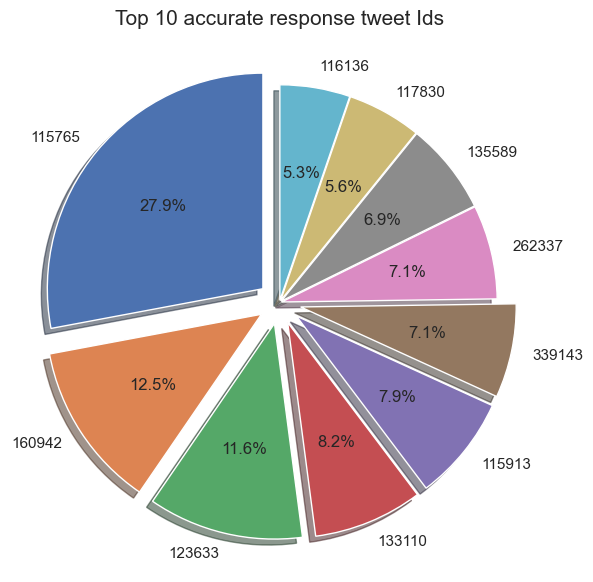

In [42]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.pie(ircdf_10['response_count'], labels = ircdf_10['author_id'],startangle=90, autopct='%1.1f%%',shadow=True,explode=(0.1, 0.1, 0.1, 0.1,0.1,0.1,0.01,0.01,0.01,0.01,))
ax.set_title("Top 10 accurate response tweet Ids", fontsize = 15)

plt.show()

## Since I know who the top companys, authors, inbound tweets, and response ids are, I will take a look at the timestamp

### Listing tweets by date -- Start with column index

In [43]:
df=df[["created_at"]].sample(frac=1).head(20).reset_index(drop=True)
df

,created_at
0,Sat Oct 14 00:05:26 +0000 2017
1,Tue Oct 10 23:20:45 +0000 2017
2,Mon Oct 09 10:35:34 +0000 2017
3,Sat Nov 18 04:59:34 +0000 2017
4,Thu Nov 23 15:40:26 +0000 2017
5,Tue Oct 24 03:59:31 +0000 2017
6,Fri Oct 06 18:01:14 +0000 2017
7,Fri Oct 13 22:54:24 +0000 2017
8,Mon Oct 16 11:55:00 +0000 2017
9,Fri Nov 10 23:46:00 +0000 2017


### Rename the 'create_at' column name - better to work with when visualizing the timestamp

In [44]:
df.rename(columns={'created_at': 'NewTime'}, inplace=True)
df.head()

,NewTime
0,Sat Oct 14 00:05:26 +0000 2017
1,Tue Oct 10 23:20:45 +0000 2017
2,Mon Oct 09 10:35:34 +0000 2017
3,Sat Nov 18 04:59:34 +0000 2017
4,Thu Nov 23 15:40:26 +0000 2017


### Change 'NewTime' column to datetime format

In [45]:
df["NewTime"] = pd.to_datetime(df["NewTime"])

### Extract year, month and day and time from "NewTime" column

In [46]:
df['Year'] = df.NewTime.dt.year
df['Month'] = df.NewTime.dt.month
df['Day'] = df.NewTime.dt.day
df['time'] = df.NewTime.dt.time

### Convert Day and Month Number to Names

In [47]:
df['Day'] = df['NewTime'].dt.day_name()
df['Month'] = df['NewTime'].dt.month_name()

In [48]:
df.head(20)

,NewTime,Year,Month,Day,time
0,2017-10-14 00:05:26+00:00,2017,October,Saturday,00:05:26
1,2017-10-10 23:20:45+00:00,2017,October,Tuesday,23:20:45
2,2017-10-09 10:35:34+00:00,2017,October,Monday,10:35:34
3,2017-11-18 04:59:34+00:00,2017,November,Saturday,04:59:34
4,2017-11-23 15:40:26+00:00,2017,November,Thursday,15:40:26
5,2017-10-24 03:59:31+00:00,2017,October,Tuesday,03:59:31
6,2017-10-06 18:01:14+00:00,2017,October,Friday,18:01:14
7,2017-10-13 22:54:24+00:00,2017,October,Friday,22:54:24
8,2017-10-16 11:55:00+00:00,2017,October,Monday,11:55:00
9,2017-11-10 23:46:00+00:00,2017,November,Friday,23:46:00


### Which Month has the most tweets? Looking at month alone, it appears that October has the most tweets

In [49]:
df.groupby("Month").size().reset_index(name="Tweets")

,Month,Tweets
0,December,1
1,November,5
2,October,14


### Which Day has the most tweets? Looking at day alone, it appears that Wednesday and Saturday has the most tweets

In [50]:
df.groupby("Day").size()

Day
Friday       5
Monday       3
Saturday     2
Sunday       4
Thursday     2
Tuesday      2
Wednesday    2
dtype: int64

### Group month and day for highest tweet? So far, it looks like each month listed in the top 20, Friday is the day with the most tweets

In [51]:
df.groupby(["Month", "Day", "time"]).size().reset_index()

,Month,Day,time,0
0,December,Sunday,21:02:23,1
1,November,Friday,14:26:40,1
2,November,Friday,23:46:00,1
3,November,Saturday,04:59:34,1
4,November,Thursday,15:40:26,1
5,November,Wednesday,17:49:25,1
6,October,Friday,00:52:28,1
7,October,Friday,18:01:14,1
8,October,Friday,22:54:24,1
9,October,Monday,10:35:34,1


## So I really want to know which day, month, and time had the most tweets. 

### Data Analysis shows that the highest number of tweets were done November  2017, on Friday at approx 04:30 in the evening

In [52]:
df.groupby(["Day", "Month", "time"]).size().reset_index()

,Day,Month,time,0
0,Friday,November,14:26:40,1
1,Friday,November,23:46:00,1
2,Friday,October,00:52:28,1
3,Friday,October,18:01:14,1
4,Friday,October,22:54:24,1
5,Monday,October,10:35:34,1
6,Monday,October,11:55:00,1
7,Monday,October,18:13:10,1
8,Saturday,November,04:59:34,1
9,Saturday,October,00:05:26,1
